<a href="https://colab.research.google.com/github/s-a-g-n-i-k-a/C/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
################ kmeans ################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [81]:
df=pd.read_csv("income.csv")
df


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income"]=scaler.transform(df[["Income($)"]])
scaler.fit(df[["Age"]])
df["age"]=scaler.transform(df[["Age"]])
df

,Name,Age,Income($),Income,age
0,Rob,27,70000,0.213675,0.058824
1,Michael,29,90000,0.384615,0.176471
2,Mohan,29,61000,0.136752,0.176471
3,Ismail,28,60000,0.128205,0.117647
4,Kory,42,150000,0.897436,0.941176
5,Gautam,39,155000,0.940171,0.764706
6,David,41,160000,0.982906,0.882353
7,Andrea,38,162000,1.000000,0.705882
8,Brad,36,156000,0.948718,0.588235
9,Angelina,35,130000,0.726496,0.529412


In [83]:
df1=df
x=df1.drop(["Age","Name","Income($)",'Income'],axis="columns")
y=df1['Income']

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [85]:
km = KMeans(n_clusters=3)
km.fit(x_train,y_train)
y_predict=km.fit_predict(df[["Age","Income($)"]])
y_predict

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [86]:
df["cluster"]=y_predict
df.head()

,Name,Age,Income($),Income,age,cluster
0,Rob,27,70000,0.213675,0.058824,1
1,Michael,29,90000,0.384615,0.176471,2
2,Mohan,29,61000,0.136752,0.176471,1
3,Ismail,28,60000,0.128205,0.117647,1
4,Kory,42,150000,0.897436,0.941176,0


/tmp/ipython-input-3452004883.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


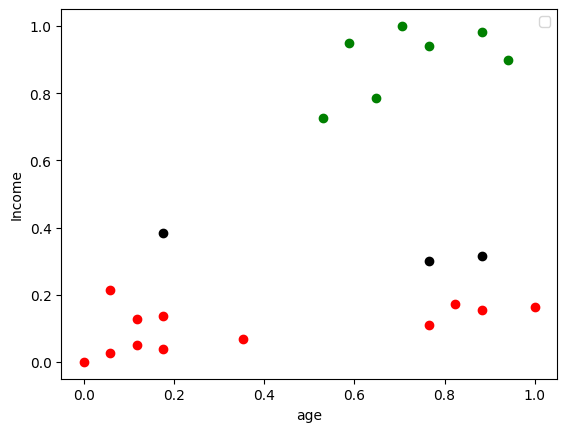

In [87]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.age,df1['Income'], color="green")

plt.scatter(df2.age,df2['Income'], color="red")

plt.scatter(df3.age,df3['Income'], color="black")


plt.xlabel("age")
plt.ylabel('Income')
plt.legend()